## Exercise 3.01: Mall Customer Segmentation - Understanding the Data

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
data0 = pd.read_csv("Mall_Customers.csv")
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Renaming columns

In [4]:
data0.rename({'Annual Income (k$)':'Income', \
              'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data0.describe()

,CustomerID,Age,Income,Spend_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Exercise 3.02: Traditional Segmentation of Mall Customers

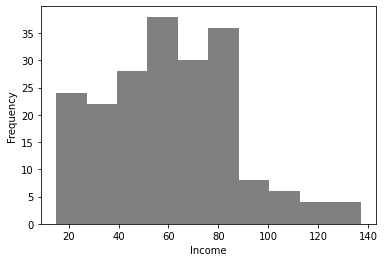

In [6]:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

2. Create a new column ‘Cluster’ to have the values ‘Low Income’, ‘Moderate Income’, ‘High earners’ for customers with income in the ranges < 50, 50 – 90, and >= 90 respectively, using the code below.

In [7]:
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                            np.where(data0.Income < 50, \
                            'Low Income', 'Moderate Income'))

In [8]:
data0.groupby('Cluster')['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


## Exercise 3.03: Standardizing Customer Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
cols_to_scale = ['Age', 'Income', 'Spend_score']

In [11]:
data_scaled = data0.copy()

In [12]:
data_scaled[cols_to_scale] = scaler.fit_transform\
                             (data0[cols_to_scale])

In [13]:
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


### Exercise 3.04: Calculating distance between customers 

In [14]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [15]:
from scipy.spatial.distance import cdist

In [16]:
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [17]:
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

## Exercise 3.05: k-means Clustering on Mall Customers

In [18]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


#### Visualize the data using a scatterplot

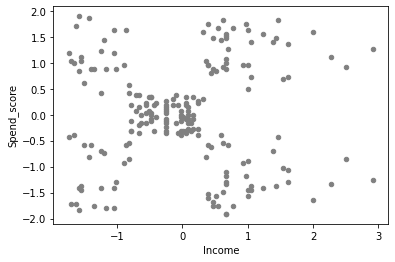

In [19]:
data_scaled.plot.scatter(x='Income', y='Spend_score', \
                         color='gray')
plt.show()

In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

In [22]:
model.fit(data_scaled[cluster_cols])

data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

In [23]:
data_scaled.head(3)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2


### Visualizing the clusters

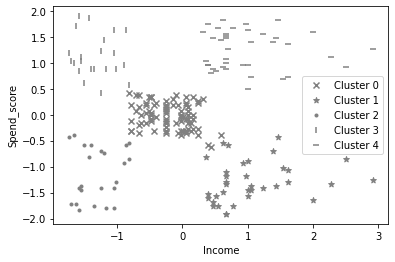

In [24]:
markers = ['x', '*', '.','|','_']

for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = 'gray',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

### Exercise 3.06: Dealing with High-Dimensional Data

1.	Create a list ‘cluster_cols’ containing the columns, ‘Age’, ‘Income’ and ‘Spend_score’ that will be used for clustering. Print the first 3 rows of the dataset for these columns.

In [25]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


2. Perform k-means clustering specifying 4 clusters using the scaled features. Specify random_state as 42. Assign the clusters to the ‘Cluster’ column.

In [26]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])

KMeans(n_clusters=4, random_state=42)

In [27]:
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

3. Using PCA on the scaled columns, create new columns 'pc1' and 'pc2' containing the data for PC1 and PC2 respectively.

In [28]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

4.	Visualize the clusters by using different markers and colours for the clusters on a scatterplot between 'pc1' and 'pc2' using the code below.

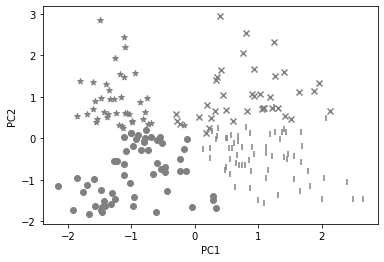

In [29]:
markers = ['x', '*', 'o','|']

for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

5.	Understanding the clusters   
    a.	Print the avg. values of the original features used for clustering against the four clusters.  
    b.	For a visual analysis, plot the average values for these features against the clusters.  
    c.	Which features are the most differentiated for the clusters?


In [30]:
data0['Cluster'] = data_scaled.Cluster

In [31]:
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


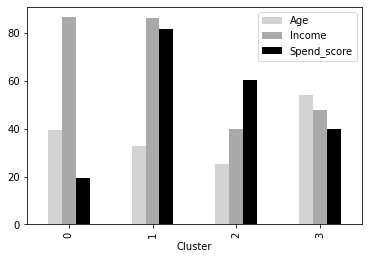

In [34]:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
                          .plot.bar(color=['lightgray', 'darkgray', \
                                           'black'])
plt.show()